# Mathematics for calculating odds and probabilities of mRS-level outcomes after stroke, based on time to reperfusion treatment

In this notebook we explain how to derive various formulae for probability and odds that will be used in predicting modified Rankin Scale (mRS) after stroke, depending on time to treatment.

The data used in this example correspond to thrombectomy treatment, and can be switched for other data as required without changing the formulae.

## Modified Rankin Scale

The modified Rankin Scale (mRS) is a commonly used scale for measuring the degree of disability or dependence in the daily activities of people who have suffered a stroke or other causes of neurological disability [Saver *et al*., 2010].

The scale runs from 0-6, running from perfect health without symptoms to death:

| Score | Description |
|---|---|
| 0 | No symptoms. |
| 1 | No significant disability. Able to carry out all usual activities, despite some symptoms. |
| 2 | Slight disability. Able to look after own affairs without assistance, but unable to carry out all previous activities. |
| 3 | Moderate disability. Requires some help, but able to walk unassisted. |
| 4 | Moderately severe disability. Unable to attend to own bodily needs without assistance, and unable to walk unassisted. |
| 5 | Severe disability. Requires constant nursing care and attention, bedridden, incontinent. |
| 6 | Dead. |

## Reperfusion treatment for ischaemic stroke

Ischaemic stroke is a stroke caused by the blockage of blood supply to an area of the brain, caused by a clot. Ischaemic strokes account for 80-85% of all strokes, with the remainder being *haemorrhagic* strokes where loss of blood supply is caused by a bleed in the brain.

*Reperfusion* describes the restoration of blood flow following an ischaemic stroke. There are two potential reperfusion treatments:

* *Thrombolysis* (also known as as *intravenous thrombolysis*, IVT) is a medical therapy where *clot-busting* drugs are used to reduce or remove the blood clot. About 20% of all stroke patients are suitable for thrombolysis. 

* *Thrombectomy* (also known as *mechanical thrombectomy*, MT) is the mechanical removal of a clot, by a mesh device under image guidance. Thrombectomy is suitable only for clots in a large vessel (these generally cause the worst strokes), and is a suitable treatment in about 10% of all stroke patients.

## Decay of effect of reperfusion treatment

Reperfusion treatment becomes less effective with increasing time after stroke (with the loss of effect occurring over some hours). Emberson *et al.* and Fransen *et al.* have described the declining effect as the declining *odds ratio* of achieving an essentially *'good outcome'* following thrombolysis (Emberson) or thrombectomy (Fransen). A *'good outcome'* has been described differently with studied on thrombolysis generally using a threshold of mRS 0-1 at 3-6 months, and thrombectomy studies generally using a threshold of mRS 0-2 at 3-6 months. The *odds ratio* describes the odds of a *'good outcome'* relative to the odds of a *'good outcome'* in an untreated control group.

The deacy in effectiveness of reperfusion is shown in the figure below (left panel = odds ratio, right panel = log odds ratio, IVT = thrombolysis, MT = thrombectomy).

![](./images/odds_decay.png)

# Aim 

We define outcome in terms of probability distributions of mRS scores. 
We know all about the probabilities of mRS at $t=0\,$hr and $t=t_{\mathrm{ne}}$, the time of no effect, from [our notebook on deriving the probability distributions](https://github.com/samuel-book/stroke_outcome/blob/main/mRS_datasets_full.ipynb).
We need to use the data we have at these two fixed times to create models that describe probability at all $t$. 

# Method 

Since we know that probability, odds, and log(odds) are all linked, 
we only need to find a formula for one of these distributions.
That formula can then be converted into the forms required to find the other quantities.
We'll start with the simplest formula, which is for log(odds).

In the literature, the log(odds ratio) has been presented at regular time intervals and falls off approximately linearly with time $t$. This allows it to be modelled as a straight line. 
The log(odds ratio) is used so that it is clear at what time the log(odds ratio) falls below zero, and so when to define the time of no effect. 
Since we are using data where we already know this time of no effect and the probability distributions at that time, we can skip a step and directly model log(odds) as a straight line. 
We can make this simplification because the straight line fits to log(odds) and to log(odds ratio) share a gradient and only differ in their start and end values (their displacement in $y$). 
The straight line has a formula $\log(O) = A + bt$ for constants $A$ and $b$.  


## Steps

The steps here are, for mRS$\leq$5$^*$:
1. Define log(odds), a straight-line formula $A + bt$. 
2. Find $A$ and $b$ using the known probabilities at $t=0\,$hr and $t=t_{\mathrm{ne}}$. 
5. Define odds, an exponential decay, by converting log(odds). 
6. Define probability as a function of $t$ by converting odds. 

$^*$ We cannot include mRS$\leq$6 in these calculations, but luckily we already know that $P(\mathrm{mRS}\leq6)=1.0$ at all $t$.

# Results

> Spoilers! 

The maths in this notebook will end up producing the following relations between time to treatment and the probability of each mRS bin.

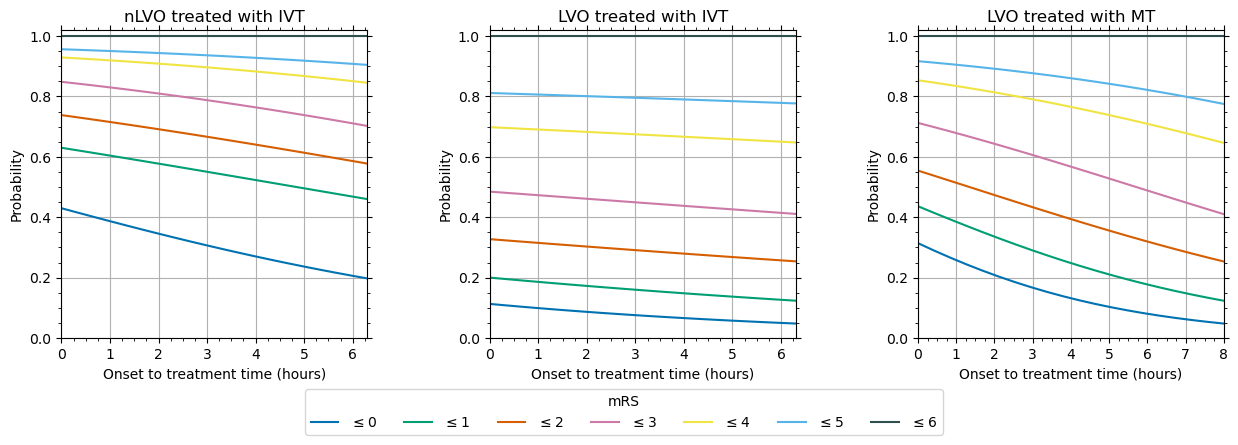

In [1]:
import outcome_utilities.plot_probs_with_time

---
# Notebook admin

In [2]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

---

# Define probability and odds

All of the quantities we will define are only valid in the time range covered by our data, which is $0\leq t \leq t_{\mathrm{ne}}$ for the no-effect time $t_{\mathrm{ne}}$.

## Probability

Firstly we will define some probability distributions in terms of $x$, which is a given modified Rankin Scale (mRS), and $t$, the time from onset to treatment.

+ $P(\mathrm{mRS}=x\ |\ t)$, the probability distribution of mRS.
+ $P(\mathrm{mRS}\leq x\ |\ t)$, the cumulative probability.

In all cases, we know that:
+ The probabilities of a condition being met and it not being met sum to 1: $ P(\mathrm{mRS}>x\ |\ t) = 1 - P(\mathrm{mRS}\leq x\ |\ t) $
+ The probability of mRS$\leq6$ is always equal to 1: $P(\mathrm{mRS}\leq6\ |\ t)=1$ at all $t$. 

## Odds

The odds are an alternative way of expressing the likeliness of an event occurring. Odds are expressed in terms of how much more (or less) likely it is that a given outcome will be attained rather than any other outcomes.

+ $\mathrm{odds} =  \frac{\mathrm{probability\ of\ this\ outcome}}{\mathrm{probability\ of\ other\ outcomes}} \phantom{g} \mathrm{(single\ patient)}  \phantom{gap} =  \frac{\mathrm{number\ of\ this\ outcome}}{\mathrm{number\ of\ other\ outcomes}} \phantom{g} \mathrm{(group\ of\ patients)}$

+ $O(\mathrm{mRS}\leq x\ |\ t) = \frac{P(\mathrm{mRS}\leq x\ |\ t)}{P(\mathrm{mRS}>x\ |\ t)}$

Special cases:
+ When only half of the outcomes are good, i.e. probability=0.5, then odds=1 and log(odds)=0. 
+ Odds and log(odds) for $\mathrm{mRS}\leq6$ are not defined for any $t$. This is because $P(\mathrm{mRS}\leq6)=1.0$ at all times, and so:
$$O(\mathrm{mRS}\leq6) = \frac{P(\mathrm{mRS}\leq6)}{1-P(\mathrm{mRS}\leq6)} = \frac{1}{0}$$

Here we will calculate odds directly from probabilities, and so the odds will be given as non-integer positive numbers rather than fractions. 

We will also consider the natural log of odds, i.e. $\log_{e}(\mathrm{odds})$. __Whenever this notebook says "log", it means natural log (base $e$).__

---

# Collect the data

We'll use the data for large-vessel occlusions (LVOs) that are treated with mechanical thrombectomy (MT), using the same probability distributions that we've defined in [this notebook](https://github.com/samuel-book/stroke_outcome/blob/main/mRS_datasets_full.ipynb). 

Define the time of no effect $t_{\mathrm{ne}}$ for LVOs treated with MT: 

In [5]:
t_ne = 8.0 # hours

Distribution of probabilities in each bin, $P(\mathrm{mRS}=x)$:

In [6]:
t0_st = 't0_treatment_lvo_mt'
ne_st = 'no_effect_lvo_mt_deaths'

In [7]:
mRS_prob_all = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_bins.csv', index_col='Stroke type')

mRS_prob_t0_treatment = mRS_prob_all.loc[t0_st].values
mRS_prob_no_effect = mRS_prob_all.loc[ne_st].values

Cumulative probabilities (`cumsum`='cum(ulative) sum'), $P(\mathrm{mRS}\leq x)$:

In [8]:
mRS_prob_cumsum_all = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

mRS_prob_cumsum_t0_treatment = mRS_prob_cumsum_all.loc[t0_st].values
mRS_prob_cumsum_no_effect = mRS_prob_cumsum_all.loc[ne_st].values

Convert probability to odds:

In [9]:
mRS_odds_cumsum_t0_treatment = (
    mRS_prob_cumsum_t0_treatment / (1.0 - mRS_prob_cumsum_t0_treatment))
mRS_odds_cumsum_no_effect = (
    mRS_prob_cumsum_no_effect / (1.0 - mRS_prob_cumsum_no_effect))

# Manually set mRS<=6 values to infinity, since P(mRS<=6)=1:
mRS_odds_cumsum_t0_treatment[-1] = np.inf 
mRS_odds_cumsum_no_effect[-1] = np.inf

Convert odds to log(odds):

In [10]:
mRS_logodds_cumsum_t0_treatment = np.log(mRS_odds_cumsum_t0_treatment)
mRS_logodds_cumsum_no_effect = np.log(mRS_odds_cumsum_no_effect)

## Plot the known data

The following two cells define some colours and a plotting function that we'll use here and later in the notebook:

In [11]:
colour_list = np.array(['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', 
                        '#56B4E9', 'DarkSlateGray'], dtype='<U13')

In [12]:
def plot_three_with_time(ylabels, data_lists):
    fig, axs = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'wspace':0.3})
    for d,data_list in enumerate(data_lists):
        ax = axs[d]
        ax.grid()
        d_t0 = data_list[0]
        d_no = data_list[1]
        for i in range(6):
            ax.scatter([0.0,t_ne], [d_t0[i],d_no[i]],
                       color=colour_list[i], label=f'$\leq${i}')

        ax.set_ylabel(ylabels[d].split('\n')[0])
        ax.set_title(ylabels[d], fontsize=15)
        ax.set_xticks(np.arange(0,t_ne+1,1))
        ax.set_xlabel('Onset to treatment time (hours)')
        if d==1:
            ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], 
                      ncol=7, title='mRS')

    axs[0].set_ylim(0.0, 1.0)
    axs[1].set_ylim(0.0, 11.5)
    axs[2].axhline(0.0, color='k', linewidth=1)
    return fig, axs

This cell produces the plot of probability, odds, and log(odds):

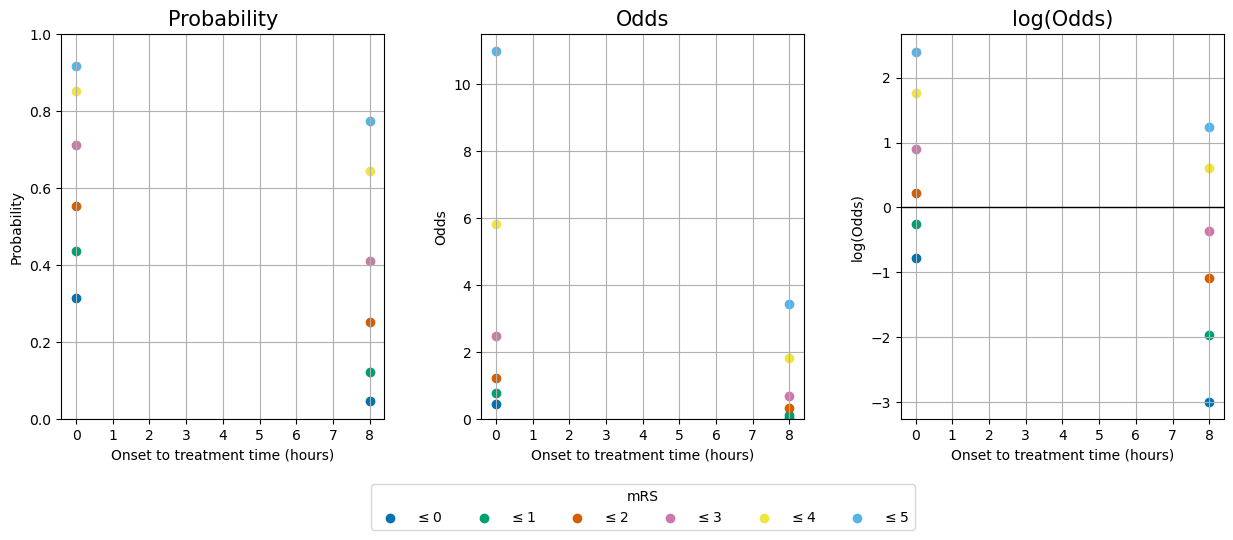

In [13]:
data_lists = [
    [mRS_prob_cumsum_t0_treatment, mRS_prob_cumsum_no_effect],
    [mRS_odds_cumsum_t0_treatment, mRS_odds_cumsum_no_effect],
    [mRS_logodds_cumsum_t0_treatment, mRS_logodds_cumsum_no_effect]
    ]

ylabels = ['Probability', 'Odds', 'log(Odds)']

fig, axs = plot_three_with_time(ylabels, data_lists)
plt.show()

Now, for each graph we need to connect the two sets of data at $t=0$ and the no-effect time by finding out how probability, odds and log(odds) vary with time. 

---

# Steps to find variation with time

## Find a straight line formula for log(odds)

We start with two different ways to write log(odds):

+ Firstly, in terms of probability we have defined $$ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1-P(\mathrm{mRS}\leq x\ |\ t)} \right] $$
+ Secondly, we assume that there is a linear relationship between log(odds) and time for all values of mRS. This gives $$ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = A_x + b_xt $$ where the values of the constants $A$ and $b$ are different for each $x$. **$A$ is log(odds) at t=0**, and **$b$ is the gradient of the straight line**. We expect $b_x$ to always be negative because the log(odds) is always greater at $t=0$ than at the no-effect time.

Equating these gives the following relation that holds for all $t$:

$$ A_x + b_xt = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1-P(\mathrm{mRS}\leq x\ |\ t)} \right] $$ 


To find $A$ and $b$, we need to consider the values of log(odds) when $t=0\,$hr or $t=t_{\mathrm{ne}}$, as this is the data available to us.

When $t=0$,

$$ A_x = \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t=0)}{1-P(\mathrm{mRS}\leq x\ |\ t=0)} \right] $$ 

When $t=t_{\mathrm{ne}}$,

$$
\begin{align*}
A_x + b_xt_{\mathrm{ne}} &= \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})}{1-P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})} \right] \\
b_x &= \frac{1}{t_{\mathrm{ne}}} \left( \log\left[ \frac{P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})}{1-P(\mathrm{mRS}\leq x\ |\ t_\mathrm{ne})} \right] - A_x\right) 
\end{align*}
$$

In both cases, we know all of the $P$ and $t$ terms on the right-hand-side and so we can calculate $A$ and $b$.

## Find an exponential formula for odds with time

We can take the exponential of $ \log\bigl[O(\mathrm{mRS}\leq x\ |\ t)\bigr] = A_x + b_xt $ to find an equation for odds:

$$ O(\mathrm{mRS}\leq x\ |\ t) = e^{Ax + bx\cdot t} $$

To see how this behaves, we can split the two terms in the exponential:

$$ O(\mathrm{mRS}\leq x\ |\ t) = e^{Ax} \cdot e^{bx\cdot t} $$

and use $A_x = \log\bigl[O(\mathrm{mRS}\leq x\ |\ t=0)\bigr]$, so 

$$ O(\mathrm{mRS}\leq x\ |\ t) = O(\mathrm{mRS}\leq x\ |\ t=0) \cdot e^{bx\cdot t} $$

This tells us that odds will decay exponentially with time because $b_x$ is always negative.

## Find a logistic formula for probability with time

Now we can set the expression for the odds ratio in exponential form equal to its definition in terms of probability:

$$O(\mathrm{mRS}\leq x\ |\ t) \phantom{g} = \phantom{g} e^{Ax + bx\cdot t} \phantom{g} = \phantom{g} \frac{P(\mathrm{mRS}\leq x\ |\ t)}{1 - P(\mathrm{mRS}\leq x\ |\ t)} $$

By setting $P \equiv P(\mathrm{mRS}\leq x\ |\ t)$ and odds $O \equiv e^{Ax + bx \cdot t}$, we can invert this to find a formula for $P$:

$$
\begin{align*} 
O & = \frac{P}{1 - P} \\
O(1-P) & = P \\
O - (O\cdot P) & = P \\ 
O & = P + (O\cdot P) \\
O & = P(1+O) \\
\frac{O}{1+O} & = P \\
\end{align*}
$$

To simplify this, we can multiply the left-hand-side by a factor of $\frac{1}{O}\div\frac{1}{O}$, which is equal to 1:

$$ P \phantom{g} = \phantom{g} \frac{O}{1+O} \cdot  \frac{\frac{1}{O}}{\frac{1}{O}} \phantom{g} = \phantom{g}  \frac{1}{\frac{1}{O} + 1}$$

Then $\frac{1}{O} = O^{-1} = \bigl(e^{Ax+bx\cdot t}\bigr)^{-1} = e^{-(Ax+bx\cdot t)}$, so

$$ P(\mathrm{mRS}\leq x\ |\ t) = \frac{1}{1+e^{-(Ax + bx\cdot t)}} $$

Finally, we have a formula to calculate $P$ at any time $t$.

> __An optional extra step:__
>
> This equation for $P(\mathrm{mRS}\leq x\ |\ t)$ is almost in the form of a [logistic function](https://en.wikipedia.org/wiki/Logistic_function):
>
> $$ f(x) = \frac{L}{1 + e^{-k(x - x_0)}} $$
>
> With one more rearrangement $ A_x + b_x t = b_x\left(t +\frac{Ax}{bx}\right) $, we have:
> 
> $$ P(\mathrm{mRS}\leq x\ |\ t) = \frac{1}{1+\exp{\bigl[-b_x\left(t +\frac{Ax}{bx}\right)\bigr]}} $$
>
> Compared with $f(x)$ above, $L=1$, $k=b_x$, $x=t$, and $x_0 = -\frac{Ax}{bx}$.

---

# Application to our data

## Calculate $A$ and $b$

We've found formulae to show how probability, odds and log(odds) vary with time. All three of these formulae require the same values of $A_x$ and $b_x$, which we can calculate using the known probabilities at time zero and the no-effect time:

In [14]:
# Use the [:-1] slice to exclude mRS<=6.
A = (np.log(mRS_prob_cumsum_t0_treatment[:-1]) - 
     np.log(1.0 - mRS_prob_cumsum_t0_treatment[:-1])) 
b = (np.log(mRS_prob_cumsum_no_effect[:-1]) - 
     np.log(1.0 - mRS_prob_cumsum_no_effect[:-1]) -A)/t_ne

`A` and `b` are arrays that each contain 6 values, one each for mRS$\leq$0,1,2,3,4,5. The following cell prints out these values as a table:

In [15]:
print('| mRS | log(odds) at t=0 |    `A`   |    `b`   |')
print('-'*48)
for i in range(6):
    print(f'|  {i}  |'+
          f'      {mRS_logodds_cumsum_t0_treatment[i]:7.4f}     |'+
          f'  {A[i]:7.4f} |'+
          f'  {b[i]:7.4f} |')

| mRS | log(odds) at t=0 |    `A`   |    `b`   |
------------------------------------------------
|  0  |      -0.7811     |  -0.7811 |  -0.2764 |
|  1  |      -0.2561     |  -0.2561 |  -0.2132 |
|  2  |       0.2186     |   0.2186 |  -0.1625 |
|  3  |       0.9068     |   0.9068 |  -0.1589 |
|  4  |       1.7631     |   1.7631 |  -0.1452 |
|  5  |       2.3990     |   2.3990 |  -0.1453 |


As expected, $A$ is equal to the log-odds at $t=0\,$hr and all of the $b$ values are negative because log(odds) decreases with time.

## Plot the new time distributions

The following cell draws the same graphs as before, and now adds the variations with time. 

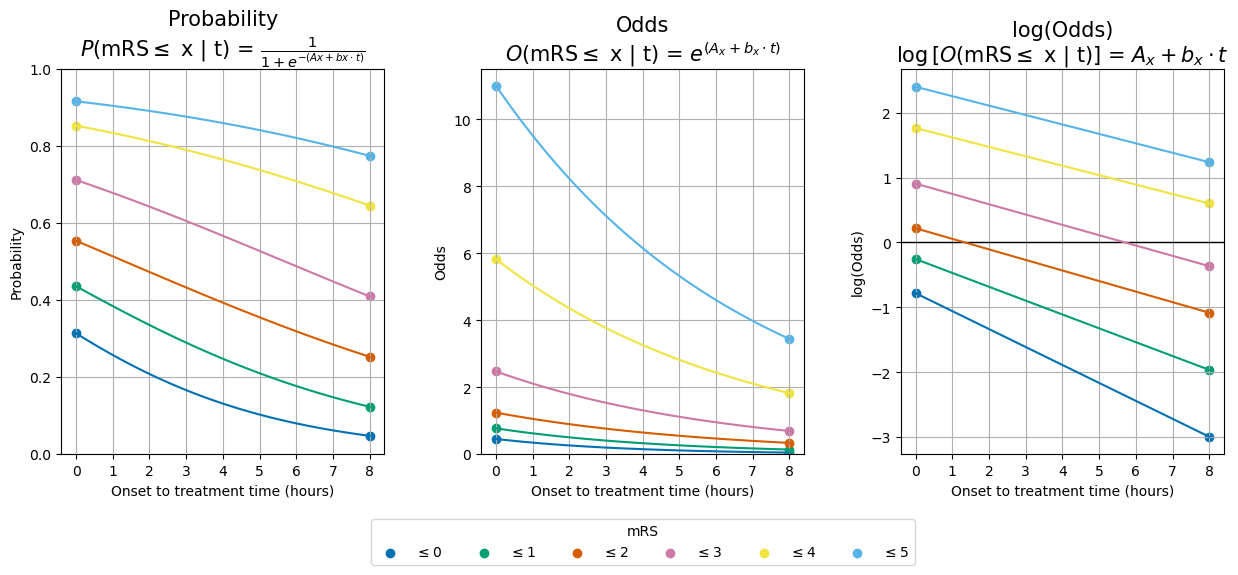

In [16]:
ylabels = [
    ('Probability\n'+r'$P$(mRS$\leq$ x | t) = '+
    r'$\frac{1}{1 + e^{-(Ax + bx\cdot t)}}$'), 
    'Odds\n'+r'$O$(mRS$\leq$ x | t) = $e^{(A_x + b_x\cdot t)}$', 
    'log(Odds)\n'+r'$\log$[$O$(mRS$\leq$ x | t)] = $A_x + b_x\cdot t$'
    ]

# Plot over this time range:
t = np.arange(0,t_ne+0.1,0.1)

# Make the same plot as earlier...
fig, axs = plot_three_with_time(ylabels, data_lists)

# ... and now add lines to connect the starting data points: 
for d, ax in enumerate(axs):
    for i in range(6):
        if d==0: # Probability:
            yvals = 1.0/(1.0 + np.exp(-b[i]*(t+A[i]/b[i])) )
        elif d==1: # Odds:
            yvals = np.exp(A[i] + b[i]*t)
        else: # log(odds):
            yvals = A[i] + b[i]*t
        ax.plot(t, yvals, color=colour_list[i])
            
plt.show()

__Success!__ We started with the data at t=0 and t=$t_{\mathrm{ne}}$ (8 hours) and have calculated the lines in between.

---

# Sidetrack: Why do the probability lines bend differently?

> This section isn't essential to understanding the probability calculation or the outcome model.

In the graph of probability with time, the lines for each mRS follow a different path. The gradient of the bottom mRS$\leq$0 line becomes less negative with increasing time, as though gradually curving upwards, whereas the top mRS$\leq$4 line has a gradient becoming more negative with time, as though curving downwards. 

The reason for this is best explained by showing a similar line, another logistic function, with a new parameter $v=-b(t+\frac{A}{b})$, so 

$$ P(v) = \frac{1}{1+e^{v}} $$

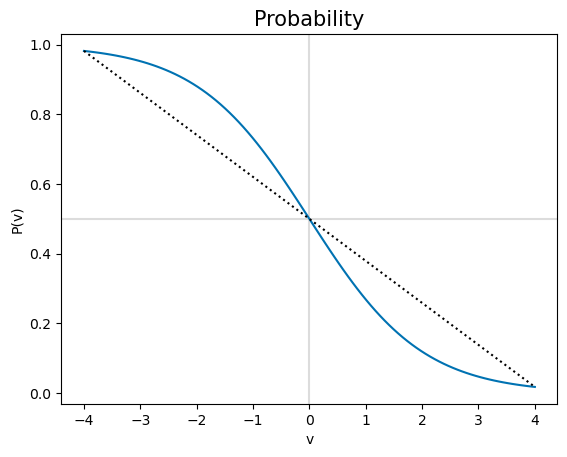

In [17]:
# Define some new parameter "v" for the x-axis:
v = np.linspace(-4,4,100)

# Add a couple of key lines:
plt.axhline(0.5,color='Gainsboro')
plt.axvline(0.0,color='Gainsboro')

# Plot probability as a function of "v":
p_v = 1.0/(1.0+np.exp(v))
plt.plot(v,p_v)

# Draw the straight line connection:
plt.plot([v[0],v[-1]], [p_v[0],p_v[-1]],
        color='k',linestyle=':')

# The usual setup:
plt.ylabel('P(v)')
plt.xlabel('v')
plt.title('Probability', fontsize=15)
plt.show()

The bend of $P(v)$ changes at $v=0$, where $P(v)=0.5$. The $P(\mathrm{mRS})$ lines are different shapes because some of them show mostly the $v>0$ curve (i.e. mRS=0,1), and the rest the $v<0$ part (i.e. mRS$\geq$2). This can be viewed as the $v$-axis here being offset to the right in the $P(t)$ plots above. The size of the offset is different for each mRS line.

The find the offset, we can convert from $v$ to $t$. Because $v=-b(t+\frac{A}{b}) =-(A+bt)$, then $t=-\frac{1}{b}(v+A)$. On the $t$-axis, the key point corresponding to $v=0$ is $t_k=-\frac{A}{b}$. This $t_k$ is different for each of the mRS lines, which is why each $P(t)$ line shows a different shift sideways from $P(v)$.  

We can plot the $P(t)$ lines again and add the key points where the bend changes:

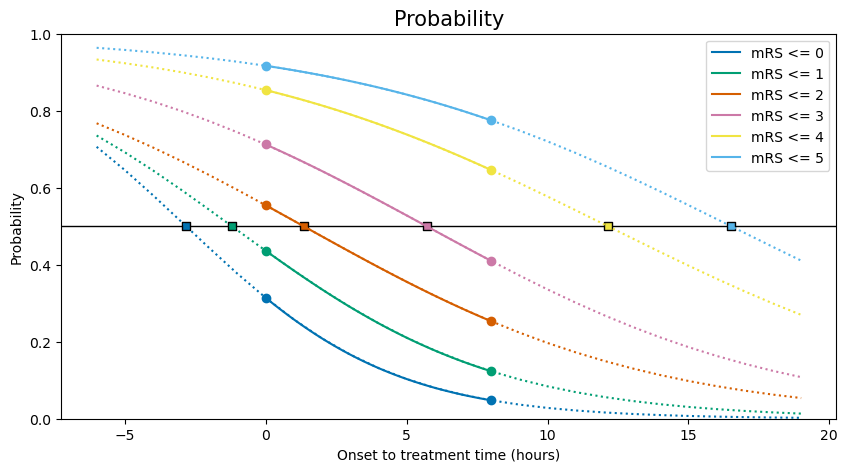

In [18]:
t = np.arange(0,t_ne+0.1,0.1)
t_long = np.arange(-6, t_ne+12)

# Store the key times t_k in this list:
tk_list = []

# Use a wider figure than usual:
plt.figure(figsize=(10,5))
for i,A_i in enumerate(A):    
    # Plot probability:
    p_i = np.exp(A_i + b[i]*t)/(1+np.exp(A_i + b[i]*t))
    l, = plt.plot(t, p_i, '-', label = f'mRS <= {i}')
    colour = l.get_color()
    
    # Plot probability over the longer time range:
    p_long = np.exp(A_i + b[i]*t_long)/(1+np.exp(A_i + b[i]*t_long))
    plt.plot(t_long, p_long, color=colour, linestyle=':')
    
    # Mark t=0 and t=t_ne data:
    plt.scatter(0,    mRS_prob_cumsum_t0_treatment[i], color=colour)
    plt.scatter(t_ne, mRS_prob_cumsum_no_effect[i], color=colour)
    
    # Calculate the key time and store it:
    t_k = -A_i/b[i]
    tk_list.append(t_k)
    plt.scatter(t_k, np.exp(A_i + b[i]*t_k)/(1+np.exp(A_i + b[i]*t_k)),
                facecolor=colour, edgecolor='k', marker='s')
    
# Add a horizontal line at P=0.5:
plt.axhline(0.5, lw=1, color='k', zorder=0)
    
# The usual setup:
plt.ylim(0,1)
plt.ylabel('Probability')
plt.xlabel('Onset to treatment time (hours)')
plt.legend(loc='best')
plt.title('Probability', fontsize=15)
plt.show()

Note that the scattered points above at $t=t_k$ all share a probability $P(t=t_k)=0.5$.

Print the key times:

In [19]:
print('mRS | Key time')
for i in range(6):
    print(f' {i}  | {int(tk_list[i]):2.0f} hours '+
          f'{np.abs(np.array(tk_list[i]))%1 *60.0:2.0f} mins')

mRS | Key time
 0  | -2 hours 50 mins
 1  | -1 hours 12 mins
 2  |  1 hours 21 mins
 3  |  5 hours 42 mins
 4  | 12 hours  9 mins
 5  | 16 hours 31 mins


---

# Sidetrack 2: What do $A$ and $b$ mean for probability?

> This section also isn't essential to understanding the probability calculation or the outcome model.

We have defined probability as a logistic function:

$$ P = \frac{1}{1+e^{-b\left(t +\frac{A}{b}\right)}} $$

Changing _A_ and _b_ then changes the slope of the function and its offset left and right. 

To see these changes, we'll plot a logistic function with an arbitrary _A_ and _b_:

In [20]:
A_start = -0.91 
b_start = -0.5

And compare it with probability data $P(\mathrm{mRS}\leq \mathrm{mRS}_x)$ for this value of mRS$_x$ where we know the target values of _A_ and _b_:

In [21]:
mRS_x = 3

A_target = A[mRS_x]
b_target = b[mRS_x]

print(A_target, b_target)

9.067535172708903e-01 -0.15886216301297962


We'll also plot over this time range, which is longer than usual: 

In [22]:
t = np.arange(-t_ne-0.1,t_ne+0.1,0.1)

To save repeating some code, we'll put the plot setup into this function: 

In [23]:
def plot_probs_logistic():
    # Mark the central point of the standard logistic function:
    plt.axvline(0.0, color='k', lw=1)
    plt.axhline(0.5, color='k', lw=1)

    # Plot the two known data points for this mRS:
    plt.scatter([0.0,t_ne], 
                [mRS_prob_cumsum_t0_treatment[mRS_x],
                 mRS_prob_cumsum_no_effect[mRS_x]], 
                label='Data', zorder=3)

    # The usual setup:
    plt.ylim(0.0,1.0)
    plt.ylabel('P(t)')
    plt.xlabel('t (hours)')
    plt.title('Probability', fontsize=15)

First, we'll plot the effect of changing _A_. At time zero, $ P(t=0) = \frac{1}{1+e^{-A}} $ so _A_ adjusts the x-offset of the curve. We can show this by plotting a series of curves where everything is identical except for _A_:

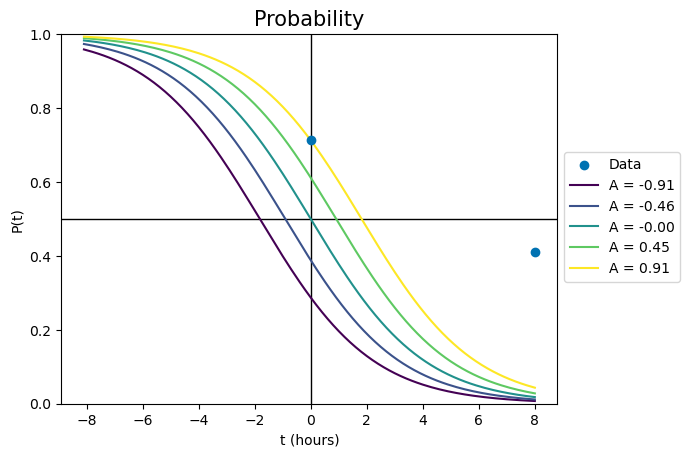

In [24]:
plot_probs_logistic()

# Plot lines for this many values of A...
n_lines = 5
# ... in these colours:
colours = plt.get_cmap('viridis')(np.linspace(0,1,n_lines))

# Plot probability as a function of time:
for i,A_line in enumerate(np.linspace(A_start, A_target, n_lines)):
    p_t = 1.0/(1.0+np.exp(-b_start * (t + A_line/b_start)) )
    plt.plot(t,p_t, color=colours[i], label=f'A = {A_line:1.2f}')

plt.legend(bbox_to_anchor=[1.0,0.5,0.2,0.2]) # outside axis
plt.show()

For the palest line, changing _A_ has fixed the probability line in the right spot at time zero. However, the line is currently nowhere near the data point at the no-effect time. To fix this, we have to change the value of _b_. 

Changing _b_ effectively changes two things simultaneously. It changes the slope of the line, so that the logistic function looks more flattened out or stretched tall. But since _b_ cannot change the value of the probability at time zero, changing _b_ must also move the probability line left or right to account for the changes. This is seen in the following plot, where every parameter of each curve is identical except for _b_. The palest yellow line is the same as in the previous plot.

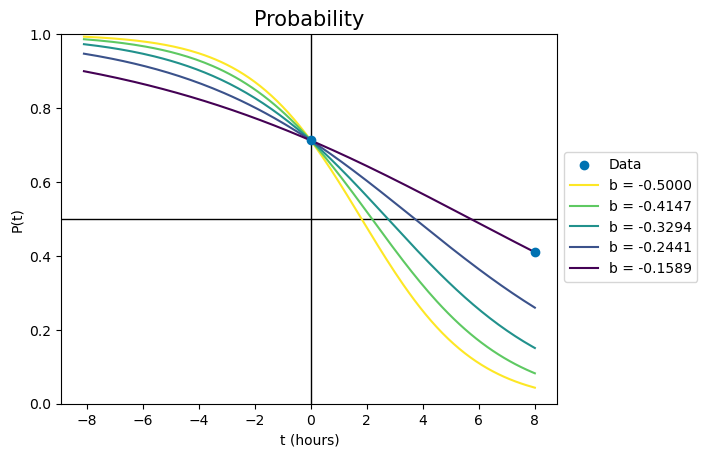

In [25]:
plot_probs_logistic()

# Plot lines for this many values of b...
n_lines = 5
# ... in these colours:
colours = plt.get_cmap('viridis')(np.linspace(0,1,n_lines)[::-1])

for i,b_line in enumerate(np.linspace(b_start, b_target, n_lines)):
    # Plot probability as a function of time:
    p_t = 1.0/(1.0+np.exp(-b_line * (t + A_target/b_line)) )
    plt.plot(t,p_t, color=colours[i], label=f'b = {b_line:1.4f}')

plt.legend(bbox_to_anchor=[1.0,0.5,0.2,0.2]) # outside axis
plt.show()

Each line has a different slope because of the changed _b_, but also a different x-offset - the lines cross $P(t)=0.5$ at different times. The darkest line uses the only combination of _A_ and _b_ that will pass through both data points simultaneously. 

Since our calculated $P(\mathrm{mRS})$ lines all use different values of _A_ and _b_, we end up plotting each line with a different slope and x-offset.

# References

Emberson J, Lees KR, Lyden P, et al. Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials. The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5

Fransen PSS, Berkhemer OA, Lingsma HF, et al. Time to Reperfusion and Treatment Effect for Acute Ischemic Stroke: A Randomized Clinical Trial. JAMA Neurol 2016;73:190–6. doi:10.1001/jamaneurol.2015.3886

Saver JL, Filip B, Hamilton S, et al. Improving the Reliability of Stroke Disability Grading in Clinical Trials and Clinical Practice. Stroke 2010;41:992–5. doi:10.1161/STROKEAHA.109.571364